### QDA VS LDA

#### Generated data with p = 2 features and a qualitative response with K = 3 classes, and n = 50 observations per class. Applied linear discriminant analysis to the data.

In [629]:

N <- 50 # Number of random samples
set.seed(123)
## Covariance matrix 
s1 <- 1
cvm <- matrix(c(s1, 0, 0, s1),2) # Covariance matrix

### Distribution 1
# Target parameters for bivariate normal distributions
m11 <- 0.5
m12 <- 0.5
# Parameters for bivariate normal distribution
m1 <- c(m11,m12) # Mean 

### Distribution 2
# Target parameters for bivariate normal distributions
m21 <- 3
m22 <- 3
# Parameters for bivariate normal distribution
m2 <- c(m21,m22) # Mean 

### Distribution 3
# Target parameters for bivariate normal distributions
m31 <- 3
m32 <- -2
# Parameters for bivariate normal distribution
m3 <- c(m31,m32) # Mean 

In [630]:
install.packages('mvtnorm')

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [631]:
library(mvtnorm)

In [632]:
bvn1 <- rmvnorm(N, mean = m1, sigma = cvm )
bvn2 <- rmvnorm(N, mean = m2, sigma = cvm )
bvn3 <- rmvnorm(N, mean = m3, sigma = cvm )

colnames(bvn1) <- c("x1","x2")
colnames(bvn2) <- c("x1","x2")
colnames(bvn3) <- c("x1","x2")

df1 <- data.frame(bvn1)
df2 <- data.frame(bvn2)
df3 <- data.frame(bvn3)

The common covariance matrix for the three classes is a 2x2 matrix with values 
\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array}

The means for variables X1 and X2 for classes K=1,2,3 are {0.5,0.5} {3,3} and {3,-2} respectively.

#### Plotted the data, with the observations in each class displayed in a different color. Computed and display the Bayes decision boundary (or Bayes decision boundaries) on this plot.

In [633]:
# Set up grid over x in [-5, 10] in both directions
x1 = seq(-5,10 , 0.1)
x2 = x1
grid = expand.grid(x1,x2)
names(grid) = c("x1","x2")

# Compute densities over grid, classify using maximum density 
d1 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = m1))
d2 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = m2))
d3 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = m3))

# Class = 1 or 2 or 3
grid$class = sapply(1:nrow(grid), function(x) which.max(c(d1[x], d2[x], d3[x])))

In [634]:
install.packages('ggplot2')

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [635]:
library(ggplot2)

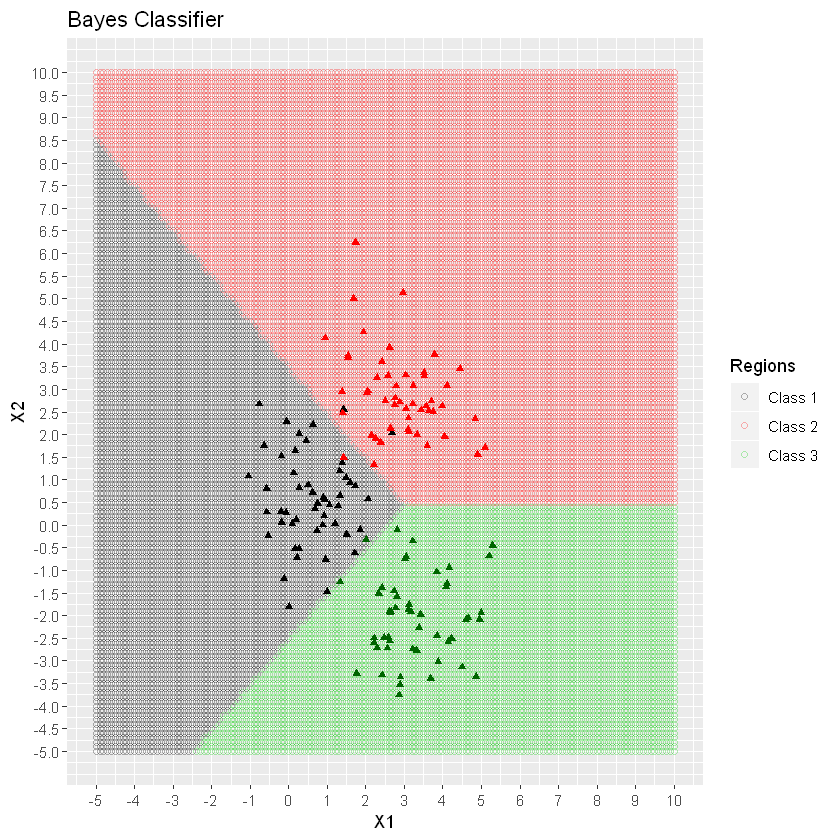

In [636]:
# Plot each grid point, coloured by the class (1 is black, 2 is red, 3 is green)
plot1 <- ggplot() +
geom_point(data=grid, aes(x=grid$x1,y=grid$x2,col=factor(grid$class)),pch=1,alpha=0.3) +
geom_point(data=df1, aes(x=df1$x1,y=df1$x2),col='black',pch=17) +
geom_point(data=df2, aes(x=df2$x1,y=df2$x2),col='red',pch=17) +
geom_point(data=df3, aes(x=df3$x1,y=df3$x2),col='darkgreen',pch=17) +
xlab('X1') +
ylab('X2') +
ggtitle("Bayes Classifier") +
scale_x_continuous(breaks = round(seq(min(grid$x1), max(grid$x1), by = 1),1)) +
scale_y_continuous(breaks = round(seq(min(grid$x2), max(grid$x2), by = 0.5),1)) +
scale_colour_identity("Regions", labels = c("Class 1","Class 2","Class 3"),guide = "legend")

plot1

#### Fitted a linear discriminant analysis model to the data, and made a plot that displays the observations as well as the decision boundary (or boundaries) corresponding to this plotted model.

In [637]:
## Add classes to the individual bivariate normal distribution dataframes
df1_lda <- df1
df2_lda <- df2
df3_lda <- df3

df1_lda$class <- 1
df2_lda$class <- 2
df3_lda$class <- 3

## Combine seperate data frames into one class for training the LDA classifier
lda_data <- df1_lda
lda_data <- rbind(lda_data,df2_lda)
lda_data <- rbind(lda_data,df3_lda)

In [638]:
install.packages("MASS")

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [639]:
library(MASS)

In [640]:
#build and train the lda classifier
lda_classifier <- lda(class∼x1+x2 ,data=lda_data)
lda_classifier

Call:
lda(class ~ x1 + x2, data = lda_data)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
         x1         x2
1 0.6104964  0.5703154
2 2.9011168  2.8837896
3 3.2816609 -2.0407307

Coefficients of linear discriminants:
           LD1        LD2
x1  0.01508405 -1.0963304
x2 -1.02932398 -0.1122045

Proportion of trace:
   LD1    LD2 
0.7255 0.2745 

In [641]:
# Set up grid over x in [-5, 10] in both directions
lda_x1 = seq(-5,10 , 0.1)
lda_x2 = x1
lda_grid = expand.grid(lda_x1,lda_x2)
names(lda_grid) = c("x1","x2")

# Class = 1 or 2 or 3
lda_grid$class <- predict(lda_classifier,lda_grid)$class

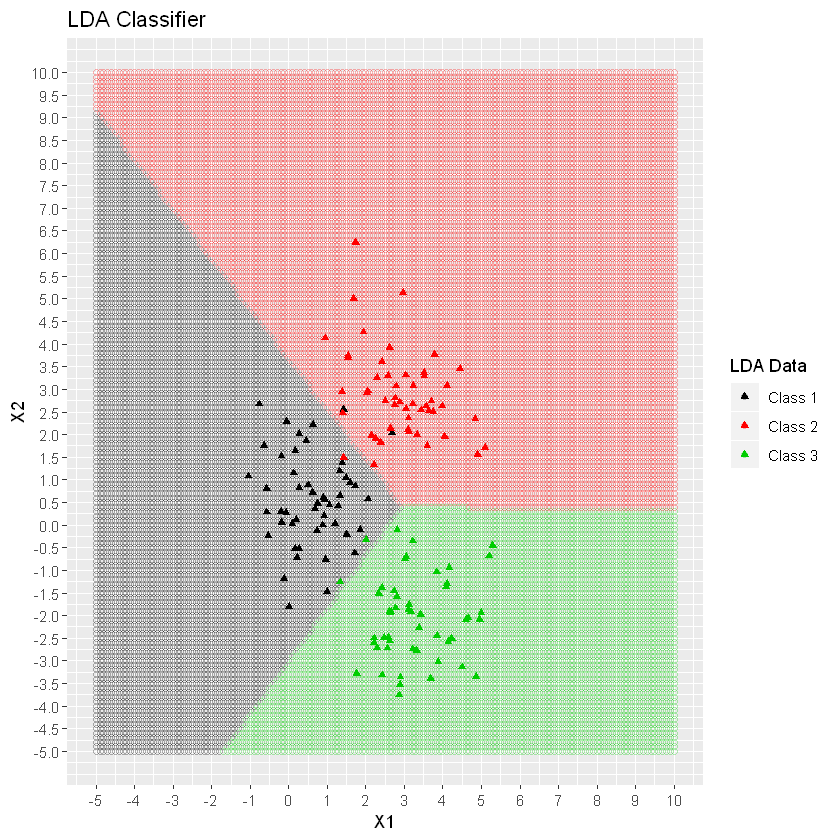

In [642]:
# Plot each grid point, coloured by the class (1 is black, 2 is red, 3 is green)

plot2 <- ggplot() +
geom_point(data=lda_grid, aes(x=lda_grid$x1,y=lda_grid$x2,col=factor(lda_grid$class)),pch=1,alpha=0.3) +
geom_point(data=lda_data, aes(x=lda_data$x1,y=lda_data$x2,col=factor(lda_data$class)),pch=17) +
xlab('X1') +
ylab('X2') +
ggtitle("LDA Classifier") +
scale_x_continuous(breaks = round(seq(min(lda_grid$x1), max(lda_grid$x1), by = 1),1)) +
scale_y_continuous(breaks = round(seq(min(lda_grid$x2), max(lda_grid$x2), by = 0.5),1)) +
scale_colour_identity("LDA Data",labels = c("Class 1","Class 2","Class 3"),
                      guide = "legend")

plot2

In [643]:
install.packages("gridExtra")

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [644]:
library(gridExtra)

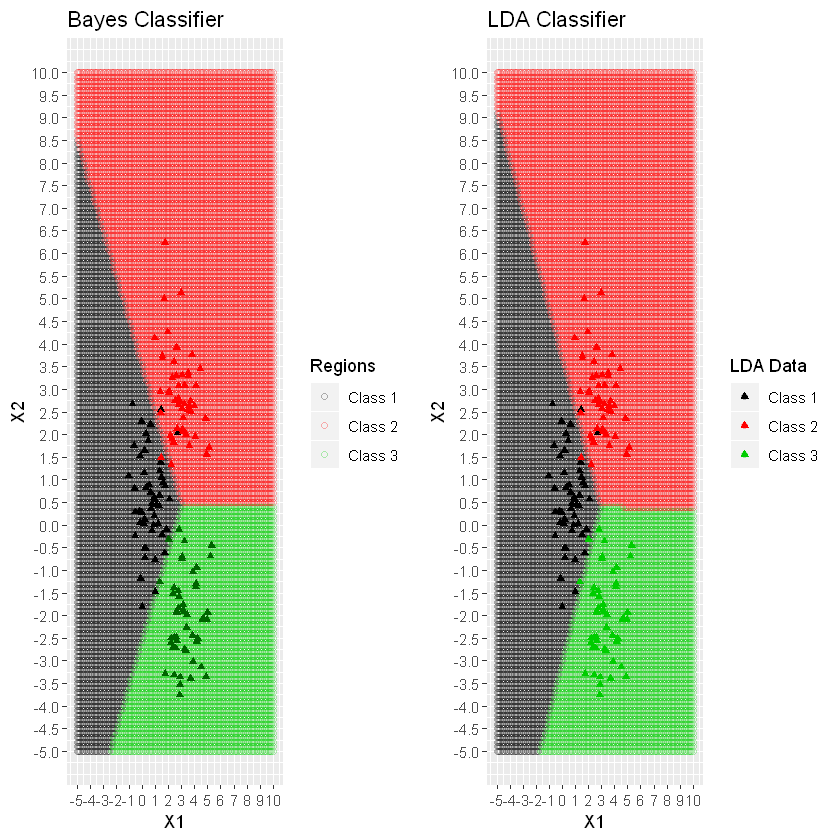

In [645]:
grid.arrange(plot1,plot2,nrow=1)

The LDA classifier is a good approximation for the Bayes classifier on the simulated training set. Based on the plotted observation alone it looks like the LDA and the Bayes classifier have similar performances on the training data set.

#### Calculated the confusion matrix and training error rate

In [646]:
#Calculate the training error
table(predict(lda_classifier,lda_data)$class,lda_data$class)

   
     1  2  3
  1 48  1  2
  2  2 49  0
  3  0  0 48

The number of misclassified observations are 5. Hence the training error rate in this case is 5/150 or 3.33%

#### Generated test data and calculated the confusion matrix and test error rate.

In [647]:

N <- 50 # Number of random samples
set.seed(986725354)

#Test distributions
test_bvn1 <- rmvnorm(N, mean = m1, sigma = cvm )
test_bvn2 <- rmvnorm(N, mean = m2, sigma = cvm )
test_bvn3 <- rmvnorm(N, mean = m3, sigma = cvm )

colnames(test_bvn1) <- c("x1","x2")
colnames(test_bvn2) <- c("x1","x2")
colnames(test_bvn3) <- c("x1","x2")

#assign classes to test data
test_df1 <- data.frame(test_bvn1)
test_df1$class <- 1
test_df2 <- data.frame(test_bvn2)
test_df2$class <- 2
test_df3 <- data.frame(test_bvn3)
test_df3$class <- 3

#combine all test data into a single dataframe
test_data <- test_df1
test_data <- rbind(test_data,test_df2)
test_data <- rbind(test_data,test_df3)

In [648]:
#create test data confusion matrix
table(predict(lda_classifier,test_data)$class,test_data$class)

   
     1  2  3
  1 49  2  6
  2  0 48  0
  3  1  0 44

The number of misclassified observations are 9. Hence the test error rate in this case is 9/150 or 6%

The training and test error rates are 3.33% and 6% respectively. Overall the error rates are small and we can conclude that the LDA classifier is performing well on both the training and test datasets.

#### Fitted a quadratic discriminant analysis model to the training data above, and made a plot that displays the observations as well as the QDA decision boundary (or boundaries) corresponding to this plotted model.

In [649]:
#build and train the qda classifier
qda_data <- lda_data
qda_classifier <- qda(class∼x1+x2 ,data=qda_data)
qda_classifier

Call:
qda(class ~ x1 + x2, data = qda_data)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
         x1         x2
1 0.6104964  0.5703154
2 2.9011168  2.8837896
3 3.2816609 -2.0407307

In [650]:
# Set up grid over x in [-5, 10] in both directions
qda_x1 = seq(-5,10 , 0.1)
qda_x2 = x1
qda_grid = expand.grid(qda_x1,qda_x2)
names(qda_grid) = c("x1","x2")

# Class = 1 or 2 or 3
qda_grid$class <- predict(qda_classifier,qda_grid)$class

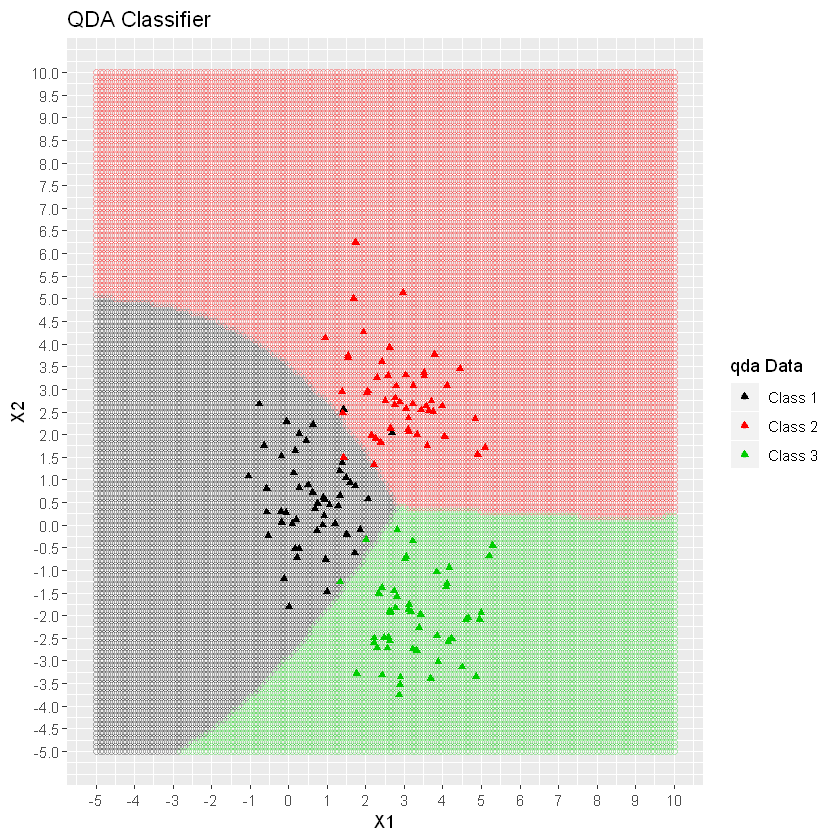

In [651]:
# Plot each grid point, coloured by the class (1 is black, 2 is red, 3 is green)

plot3 <- ggplot() +
geom_point(data=qda_grid, aes(x=qda_grid$x1,y=qda_grid$x2,col=factor(qda_grid$class)),pch=1,alpha=0.3) +
geom_point(data=qda_data, aes(x=qda_data$x1,y=qda_data$x2,col=factor(qda_data$class)),pch=17) +
xlab('X1') +
ylab('X2') +
ggtitle("QDA Classifier") +
scale_x_continuous(breaks = round(seq(min(qda_grid$x1), max(qda_grid$x1), by = 1),1)) +
scale_y_continuous(breaks = round(seq(min(qda_grid$x2), max(qda_grid$x2), by = 0.5),1)) +
scale_colour_identity("qda Data",labels = c("Class 1","Class 2","Class 3"),
                      guide = "legend")

plot3

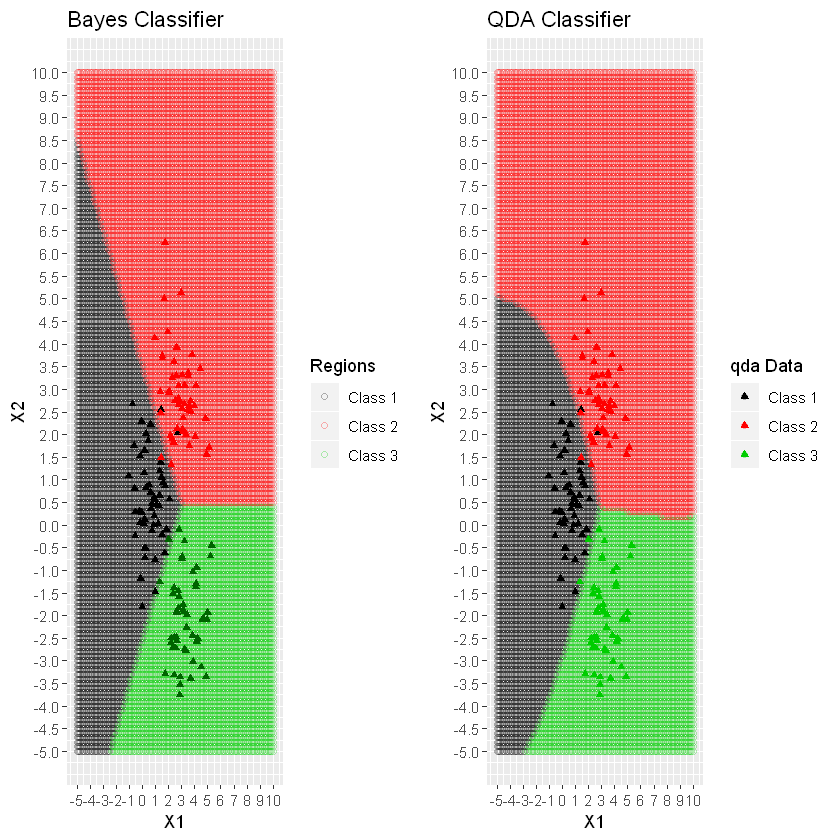

In [652]:
grid.arrange(plot1,plot3,nrow=1)

In the above case the QDA classifier does not approximate the Bayes decision boundary as well as the LDA classifier. Infact the QDA decision boundary suffers from higher variance without a corresponding decrease in bias. Hence its performance is worse. 

#### Calculated the K x K confusion matrix for the QDA model on the training data, as well as the training error rate.

In [653]:
#Calculate the training error
table(predict(qda_classifier,qda_data)$class,qda_data$class)

   
     1  2  3
  1 48  1  2
  2  2 49  0
  3  0  0 48

The number of misclassified observations are 5. Hence the training error rate in this case is 5/150 or 3.33%

#### Calculated the K x K confusion matrix for the QDA model on the test data, as well as the test error rate.

In [654]:
#create test data confusion matrix
table(predict(qda_classifier,test_data)$class,test_data$class)

   
     1  2  3
  1 49  4  6
  2  0 46  0
  3  1  0 44

The number of misclassified observations are 11. Hence the test error rate in this case is 11/150 or 7.33%

The training and test error rates are 3.33% and 7.33% respectively. The test error rate is higher than the training error rate which was expected. 

Both the LDA and QDA classifiers had the same training error rate of 3.33%

The QDA classifier has a larger error rate than the LDA classifier: 7.33% for QDA vs 6% for LDA.

#### Generated data such the classes now follow a different covariance matrix for all three classes.

In [657]:

nsample <- 50 # Number of random samples
set.seed(699)
## Covariance matrix 
var1 <- 1
cvm1 <- matrix(c(var1, 0, 0, var1),2) # Covariance matrix

var2 <- 1
cvm2 <- matrix(c(var2, 0, 0, var2),2) # Covariance matrix

var3 <- 1
var4 <- 2
cvm3 <- matrix(c(var3, 0, 0, var4),2) # Covariance matrix

### Distribution 1
# Target parameters for bivariate normal distributions
mu11 <- 0.5
mu12 <- 0.5
# Parameters for bivariate normal distribution
mu1 <- c(mu11,mu12) # Mean 

### Distribution 2
# Target parameters for bivariate normal distributions
mu21 <- 3
mu22 <- 3
# Parameters for bivariate normal distribution
mu2 <- c(mu21,mu22) # Mean 

### Distribution 3
# Target parameters for bivariate normal distributions
mu31 <- 4
mu32 <- -2
# Parameters for bivariate normal distribution
mu3 <- c(mu31,mu32) # Mean 

In [658]:
bivn1 <- rmvnorm(nsample, mean = mu1, sigma = cvm1 )
bivn2 <- rmvnorm(nsample, mean = mu2, sigma = cvm2 )
bivn3 <- rmvnorm(nsample, mean = mu3, sigma = cvm3 )

colnames(bivn1) <- c("x1","x2")
colnames(bivn2) <- c("x1","x2")
colnames(bivn3) <- c("x1","x2")

dfr1 <- data.frame(bivn1)
dfr2 <- data.frame(bivn2)
dfr3 <- data.frame(bivn3)

The covariance matrix for classes K=1,2,3 are 2x2 matrices with values 
\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array}
  
  \begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array}
  
  \begin{array}{cc}
   1 & 0 \\
   0 & 2 \\
  \end{array}

The means for variables X1 and X2 for classes K=1,2,3 are {0.5,0.5} {3,3} and {4,-2} respectively.

#### Plotted the Bayes decision boundary on this data.

In [659]:
# Set up grid over x in [-5, 10] in both directions
x1 = seq(-10,10 , 0.1)
x2 = x1
grid = expand.grid(x1,x2)
names(grid) = c("x1","x2")

# Compute densities over grid, classify using maximum density 
den1 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = mu1))
den2 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = mu2))
den3 = apply(grid, 1, function(x) dmvnorm(as.numeric(x), mean = mu3))

# Class = 1 or 2 or 3
grid$class = sapply(1:nrow(grid), function(x) which.max(c(den1[x], den2[x], den3[x])))

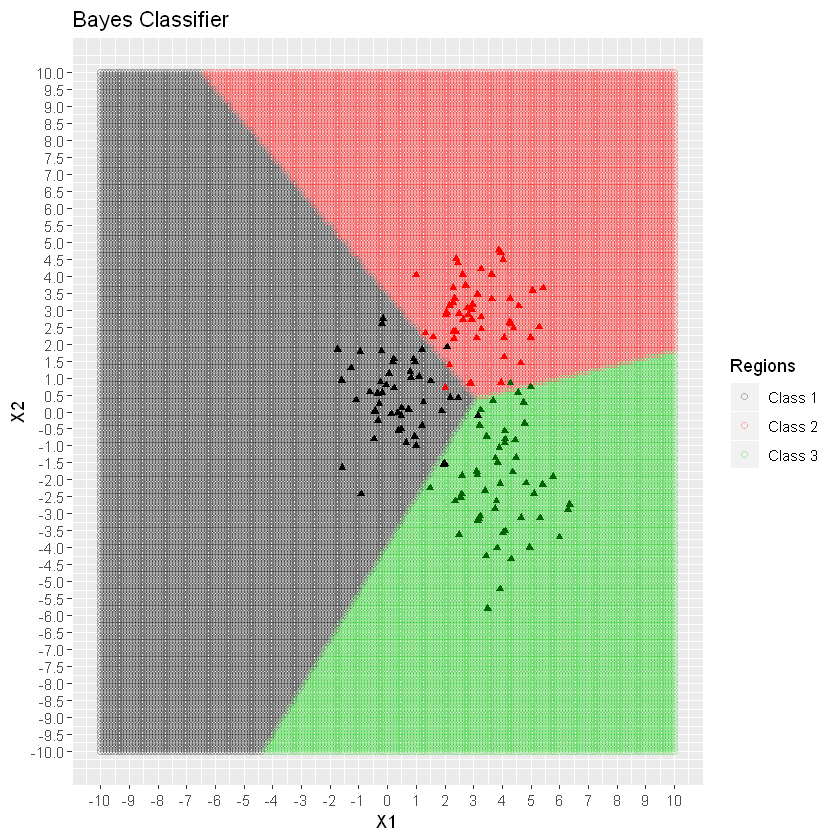

In [660]:
# Plot each grid point, coloured by the class (1 is black, 2 is red, 3 is green)
plot1 <- ggplot() +
geom_point(data=grid, aes(x=grid$x1,y=grid$x2,col=factor(grid$class)),pch=1,alpha=0.3) +
geom_point(data=dfr1, aes(x=dfr1$x1,y=dfr1$x2),col='black',pch=17) +
geom_point(data=dfr2, aes(x=dfr2$x1,y=dfr2$x2),col='red',pch=17) +
geom_point(data=dfr3, aes(x=dfr3$x1,y=dfr3$x2),col='darkgreen',pch=17) +
xlab('X1') +
ylab('X2') +
ggtitle("Bayes Classifier") +
scale_x_continuous(breaks = round(seq(min(grid$x1), max(grid$x1), by = 1),1)) +
scale_y_continuous(breaks = round(seq(min(grid$x2), max(grid$x2), by = 0.5),1)) +
scale_colour_identity("Regions", labels = c("Class 1","Class 2","Class 3"),guide = "legend")

plot1

#### Fitted both LDA and QDA classifiers to this data and plotted my observations. Compared both training and test error rates (on generated test data) across both classifiers. 

In [661]:
## Add classes to the individual bivariate normal distribution dataframes
dfr1_lda <- dfr1
dfr2_lda <- dfr2
dfr3_lda <- dfr3

dfr1_lda$class <- 1
dfr2_lda$class <- 2
dfr3_lda$class <- 3

## Combine seperate data frames into one class for training the LDA classifier
tot_lda_data <- dfr1_lda
tot_lda_data <- rbind(tot_lda_data,dfr2_lda)
tot_lda_data <- rbind(tot_lda_data,dfr3_lda)

In [662]:
#build and train the lda classifier
lda_classifier <- lda(class∼x1+x2 ,data=tot_lda_data)
lda_classifier

Call:
lda(class ~ x1 + x2, data = tot_lda_data)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
        x1         x2
1 0.374159  0.4263395
2 3.165276  2.8774907
3 4.013063 -2.1184392

Coefficients of linear discriminants:
          LD1        LD2
x1  0.4929440 -0.8059361
x2 -0.6861842 -0.4252578

Proportion of trace:
   LD1    LD2 
0.6266 0.3734 

In [663]:
#build and train the lda classifier
tot_qda_data <- tot_lda_data
qda_classifier <- qda(class∼x1+x2 ,data=tot_qda_data)
qda_classifier

Call:
qda(class ~ x1 + x2, data = tot_qda_data)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
        x1         x2
1 0.374159  0.4263395
2 3.165276  2.8774907
3 4.013063 -2.1184392

In [664]:
# Set up grid over x in [-5, 10] in both directions
combined_x1 = seq(-10,10 , 0.1)
combined_x2 = combined_x1
combined_grid = expand.grid(combined_x1,combined_x2)
names(combined_grid) = c("x1","x2")

# Class = 1 or 2 or 3
#combined_grid$class <- predict(lda_classifier,lda_grid)$class

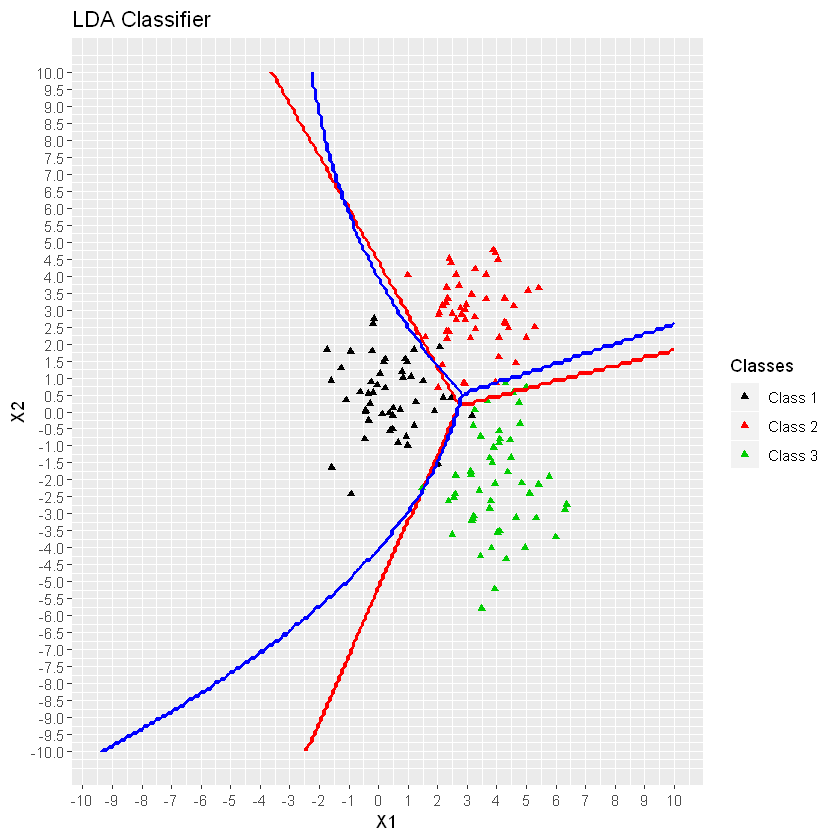

In [665]:
# Plot each grid point, coloured by the class (1 is black, 2 is red, 3 is green)

plot2 <- ggplot() +
geom_point(data=tot_lda_data, aes(x=tot_lda_data$x1,y=tot_lda_data$x2,col=factor(tot_lda_data$class)),pch=17) +
geom_contour(data=combined_grid,aes(x=combined_grid$x1,y=combined_grid$x2,z=as.numeric(predict(lda_classifier,combined_grid)$class)),color="red")+
geom_contour(data=combined_grid,aes(x=combined_grid$x1,y=combined_grid$x2,z=as.numeric(predict(qda_classifier,combined_grid)$class)),color="blue")+
xlab('X1') +
ylab('X2') +
ggtitle("LDA Classifier") +
scale_x_continuous(breaks = round(seq(min(combined_grid$x1), max(combined_grid$x1), by = 1),1)) +
scale_y_continuous(breaks = round(seq(min(combined_grid$x2), max(combined_grid$x2), by = 0.5),1)) +
scale_colour_identity("Classes",labels = c("Class 1","Class 2","Class 3"),
                      guide = "legend")

plot2

In [666]:
#Calculate the training error
table(predict(lda_classifier,tot_lda_data)$class,tot_lda_data$class)

   
     1  2  3
  1 46  2  1
  2  1 48  2
  3  3  0 47

The number of misclassified observations are 9. Hence the training error rate in this case is 9/150 or 6%

In [667]:
#Calculate the training error
table(predict(qda_classifier,tot_qda_data)$class,tot_qda_data$class)

   
     1  2  3
  1 46  1  1
  2  1 48  0
  3  3  1 49

The number of misclassified observations are 7. Hence the training error rate in this case is 7/150 or 4.7%

In [668]:

N <- 50 # Number of random samples
set.seed(650)

#Test distributions
test_bvn1 <- rmvnorm(N, mean = mu1, sigma = cvm1 )
test_bvn2 <- rmvnorm(N, mean = mu2, sigma = cvm2 )
test_bvn3 <- rmvnorm(N, mean = mu3, sigma = cvm3 )

colnames(test_bvn1) <- c("x1","x2")
colnames(test_bvn2) <- c("x1","x2")
colnames(test_bvn3) <- c("x1","x2")

#assign classes to test data
test_dfr1 <- data.frame(test_bvn1)
test_dfr1$class <- 1
test_dfr2 <- data.frame(test_bvn2)
test_dfr2$class <- 2
test_dfr3 <- data.frame(test_bvn3)
test_dfr3$class <- 3

#combine all test data into a single dataframe
com_test_data <- test_dfr1
com_test_data <- rbind(com_test_data,test_dfr2)
com_test_data <- rbind(com_test_data,test_dfr3)

In [669]:
#create test data confusion matrix
table(predict(lda_classifier,com_test_data)$class,com_test_data$class)

   
     1  2  3
  1 46  3  1
  2  2 47  2
  3  2  0 47

The number of misclassified observations are 10. Hence the test error rate in this case is 10/150 or 6.7%

In [670]:
#create test data confusion matrix
table(predict(qda_classifier,com_test_data)$class,com_test_data$class)

   
     1  2  3
  1 46  2  1
  2  2 48  1
  3  2  0 48

The number of misclassified observations are 8. Hence the test error rate in this case is 8/150 or 5.33%

The training error rates for LDA and QDA are 6% and 4.7% respectively. Hence the QDA classifier is performing better on the training set.

The training error rates for LDA and QDA are 6.7% and 5.33% respectively. Hence the QDA classifier is performing better on the test set.

## Solution 4

In [675]:
install.packages("ISLR")

Installing package into 'C:/Users/shett/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [676]:
library("ISLR")

In [677]:
heart <- read.csv("Heart.csv")
head(heart,5)

X,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [678]:
summary(heart)

       X              Age             Sex                ChestPain  
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   asymptomatic:144  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   nonanginal  : 86  
 Median :152.0   Median :56.00   Median :1.0000   nontypical  : 50  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   typical     : 23  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000                     
 Max.   :303.0   Max.   :77.00   Max.   :1.0000                     
                                                                    
     RestBP           Chol            Fbs            RestECG      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.000

In [679]:
hc <- heart
hc$ChestPain <- NULL
hc$Thal <- NULL

In [680]:
head(hc,6)

X,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
1,63,1,145,233,1,2,150,0,2.3,3,0,No
2,67,1,160,286,0,2,108,1,1.5,2,3,Yes
3,67,1,120,229,0,2,129,1,2.6,2,2,Yes
4,37,1,130,250,0,0,187,0,3.5,3,0,No
5,41,0,130,204,0,2,172,0,1.4,1,0,No
6,56,1,120,236,0,0,178,0,0.8,1,0,No


In [681]:
summary(hc)

       X              Age             Sex             RestBP     
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   : 94.0  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:120.0  
 Median :152.0   Median :56.00   Median :1.0000   Median :130.0  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :131.7  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:140.0  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :200.0  
                                                                 
      Chol            Fbs            RestECG           MaxHR      
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
   

### 4a.

Data Set Information:
This is the Heart dataset from the ISLR package. This dataset has p = 11 features and k=2 where the 2 classes indicate the presence or absence of Angiographic Heart Disease (Yes,No).  
Attribute Information:
Only 12 attributes used: 
1. (Age) - age in years
2. (Sex) - sex (1 = male; 0 = female)
3. (RestBP) -  resting blood pressure (in mm Hg on admission to the hospital) 
4. (Chol) - serum cholestoral in mg/dl 
5. (Fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
6. (RestECG) - resting electrocardiographic results 
7. (MaxHR) - Maximum Heart Rate
8. (ExAng) - exercise induced angina (1 = yes; 0 = no) 
9. (Oldpeak) - ST depression induced by exercise relative to rest 
10. (Slope) - the slope of the peak exercise ST segment 
11. (Ca) - number of major vessels (0-3) colored by flourosopy 
12. (AHD) (the predicted attribute) - Angiographic Heart Disease Status

Sample Size in each class for AHD
1. k = 1 = No = 164 observations
2. k = 2 = Yes = 139 observations

All variables are quantitative

### 4b.

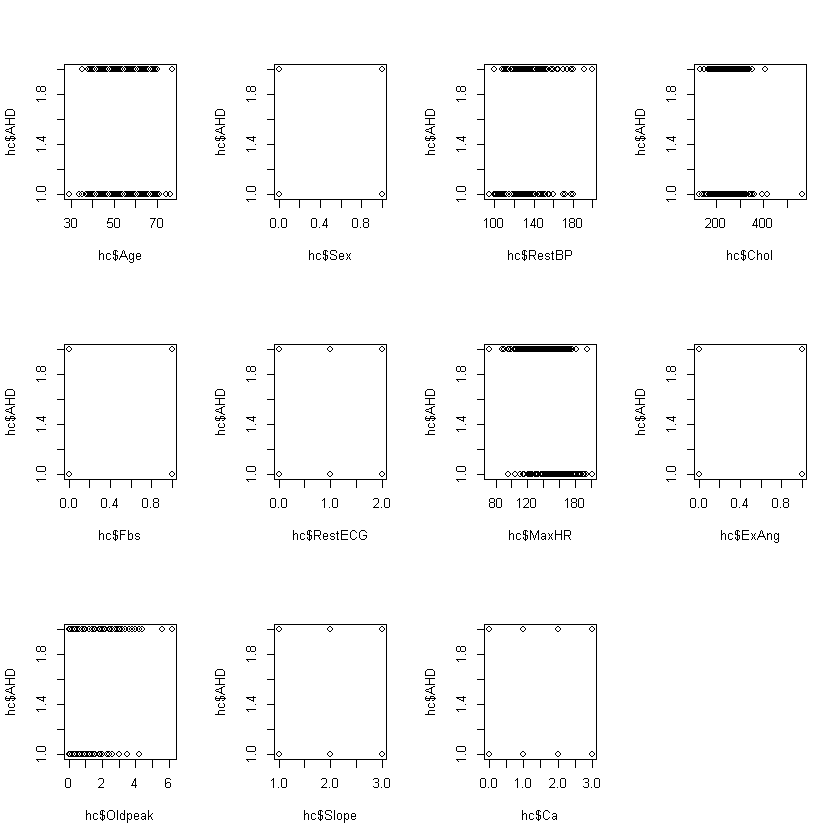

In [682]:
par(mfrow=c(3,4))
plot(x=hc$Age,y=hc$AHD)
plot(x=hc$Sex,y=hc$AHD)
plot(x=hc$RestBP,y=hc$AHD)
plot(x=hc$Chol,y=hc$AHD)
plot(x=hc$Fbs,y=hc$AHD)
plot(x=hc$RestECG,y=hc$AHD)
plot(x=hc$MaxHR,y=hc$AHD)
plot(x=hc$ExAng,y=hc$AHD)
plot(x=hc$Oldpeak,y=hc$AHD)
plot(x=hc$Slope,y=hc$AHD)
plot(x=hc$Ca,y=hc$AHD)

The variables Slope, Ca, ExAng, RestECG, Fbs and Sex are variables with fixed values. Hence it is difficult to predict the outcome of Y(AHD) based on the scatterplots for these variables.

In the case of Age, Chol and OldPeak the spread of data across the X axis is more or less the same for both Y = 1 or Y = 2 and hence there seems to be no discernible trend in the scatter plots that would help predict Y(AHD)

RestBP - Based on the scatterplot alone there is a slight positive correlation between RestBP and Y(AHD)

MaxHR - Based on the scatterplot alone there is a slight negative correlation between MaxHR and Y(AHD)



### 4c.

In [683]:
logfit <- glm(AHD ~ Age+Sex+RestBP+Chol+Fbs+RestECG+MaxHR+ExAng+Oldpeak+Slope+Ca,data=hc,family=binomial())
summary(logfit)


Call:
glm(formula = AHD ~ Age + Sex + RestBP + Chol + Fbs + RestECG + 
    MaxHR + ExAng + Oldpeak + Slope + Ca, family = binomial(), 
    data = hc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6250  -0.5598  -0.2238   0.5311   2.5436  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.536218   2.460752  -1.437  0.15070    
Age         -0.016989   0.022313  -0.761  0.44643    
Sex          1.790264   0.415343   4.310 1.63e-05 ***
RestBP       0.021924   0.010099   2.171  0.02994 *  
Chol         0.006570   0.003629   1.810  0.07027 .  
Fbs         -0.980675   0.490803  -1.998  0.04571 *  
RestECG      0.131016   0.170218   0.770  0.44148    
MaxHR       -0.027097   0.009374  -2.891  0.00384 ** 
ExAng        1.512324   0.369133   4.097 4.19e-05 ***
Oldpeak      0.242883   0.193560   1.255  0.20954    
Slope        0.677031   0.337920   2.004  0.04512 *  
Ca           1.336411   0.245082   5.453 4.95e-08 ***
---
Signif. codes:

### 4d.

According to the model in c we can reject the variables Age, Chol, RestECG, Oldpeak because the p values are greater than significance level 0.05. While the impact of RestECG was difficult to determine from the scatterplots alone, we were able to see that Age, Chol and Oldpeak had no impact on AHD based on the scatterplots alone.

### 4e.

According to the model in c X1 = Age. It has a coefficient of -0.016989. Therefore a one unit increase in Age leads to a roughly 0.017 unit decrease in the log odds for AHD.